In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv("C:/Users/admin/Intern/DataSets/winequality-red.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
X = df.drop(columns='quality', axis=1)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance by PCA Components:", pca.explained_variance_ratio_)

Explained Variance by PCA Components: [0.28173931 0.1750827 ]


In [22]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

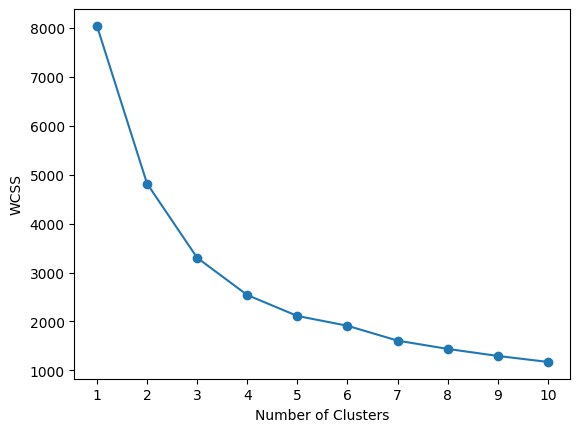

In [24]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
from kneed import KneeLocator

In [26]:
kl = KneeLocator(range(1, 11), inertia, curve='convex', direction='decreasing')
print(kl.elbow)

3


In [35]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_pca)
cluster_centers = kmeans.cluster_centers_

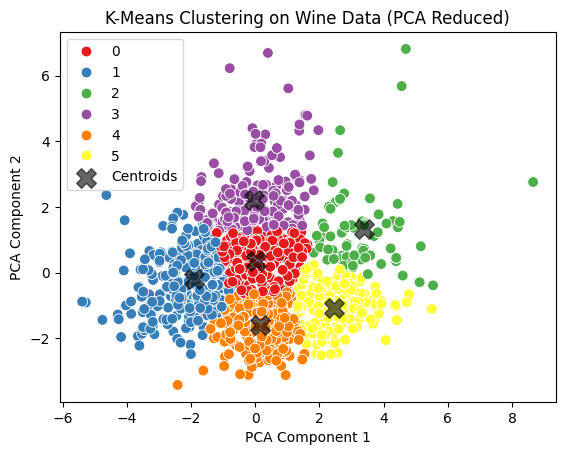

In [39]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1', s=60)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
            s=200, alpha=0.6, c='black', marker='X', label='Centroids')

plt.title("K-Means Clustering on Wine Data (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()